In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(39209, 32, 32, 3) (39209,) (12630, 32, 32, 3) (12630,)


In [2]:
print(X_train.shape, X_test.shape)
from collections import Counter

c = Counter( y_train )

print( c.items() )
# Shows that training set is uneven distributed

(39209, 32, 32, 3) (12630, 32, 32, 3)
dict_items([(0, 210), (1, 2220), (2, 2250), (3, 1410), (4, 1980), (5, 1860), (6, 420), (7, 1440), (8, 1410), (9, 1470), (10, 2010), (11, 1320), (12, 2100), (13, 2160), (14, 780), (15, 630), (16, 420), (17, 1110), (18, 1200), (19, 210), (20, 360), (21, 330), (22, 390), (23, 510), (24, 270), (25, 1500), (26, 600), (27, 240), (28, 540), (29, 270), (30, 450), (31, 780), (32, 240), (33, 689), (34, 420), (35, 1200), (36, 390), (37, 210), (38, 2070), (39, 300), (40, 360), (41, 240), (42, 240)])


In [3]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = 39209

# TODO: Number of testing examples.
n_test = 12630

# TODO: What's the shape of an traffic sign image?
image_shape = '32x32x3'

# TODO: How many unique classes/labels there are in the dataset.
n_classes = 43

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = 32x32x3
Number of classes = 43


38


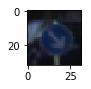

In [4]:
### Data exploration visualization goes here.
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])

In [5]:
### Preprocess the data here.

## Normalize the data to zero mean and equal variance using pixel depth

print("Min and Max values original train dataset", np.amin(X_train[0]), np.amax(X_train[0]))

pixel_depth = 255
X_train_norm = (X_train.astype(float))/255 -0.5
X_test_norm = (X_test.astype(float))/255 -0.5
# X_train_norm = X_train.astype(float) - 
#                     pixel_depth / 2) / pixel_depth

# X_test_norm = (X_test.astype(float) - 
#                     pixel_depth / 2) / pixel_depth

print("Min and Max values normalized train dataset", np.amin(X_train_norm[0]), np.amax(X_train_norm[0]))

## Shuffle training data
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train_norm, y_train)

### Feel free to use as many code cells as needed.
print(y_train[:50])
# Yes! Data is shuffled now

Min and Max values original train dataset 53 255
Min and Max values normalized train dataset -0.292156862745098 0.5
[35 38  4 38 35 38 32  7 21 25 13 13 11  5  9  4 13 23 18  3 25  6 11 35
  1  4 29  2  5  3  2 12  1 39  9  8 10  8 28  7  5  7 30 10  1 18  2  3
 26 14]


In [6]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
from sklearn.cross_validation import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(
X_train, y_train, test_size=0.2, random_state=2275)

print("train dataset", X_train.shape, y_train.shape)
print("Validation dataset", X_valid.shape, y_valid.shape)

C:\Users\gvvam\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


train dataset (31367, 32, 32, 3) (31367,)
Validation dataset (7842, 32, 32, 3) (7842,)


In [7]:
print(X_valid[2].shape)

(32, 32, 3)


In [8]:
### Define your architecture here.
import tensorflow as tf

EPOCHS = 30
BATCH_SIZE = 128
dropout = 0.70
### Feel free to use as many code cells as needed.

C:\Users\gvvam\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [9]:
## Lets start with LeNet architecture
from tensorflow.contrib.layers import flatten

def LeNet(x, add_dropout = False):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID', name='conv1')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID', name='conv2') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Add another convolution layer
    
    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b

    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    
    # Add dropout
    if add_dropout:
        fc1 = tf.nn.dropout(fc1, dropout)
    

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    # Add dropout
    if add_dropout:
        fc2 = tf.nn.dropout(fc2, dropout)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    regularizers = (tf.nn.l2_loss(fc1_W) + tf.nn.l2_loss(fc1_b) + tf.nn.l2_loss(fc2_W) + tf.nn.l2_loss(fc2_b) + tf.nn.l2_loss(fc3_W) + tf.nn.l2_loss(fc3_b))
    
    return logits, regularizers

In [10]:
## Create placeholders for input tensors
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
num_labels = 43
# sparse_labels = tf.reshape(y, [-1, 1])
# derived_size = tf.shape(sparse_labels)[0]
# indices = tf.reshape(tf.range(0, derived_size, 1), [-1, 1])
# concated = tf.concat(1, [indices, sparse_labels])
# outshape = tf.concat(0, [tf.reshape(derived_size, [1]), tf.reshape(num_labels, [1])])
# one_hot_y = tf.sparse_to_dense(concated, outshape, 1.0, 0.0)
one_hot_y = tf.one_hot(y, 43)

In [11]:
# Define learning rate and the training pipeline 
rate = 0.001 # Learning rate
factor = 5e-4 # Regularization factor

logits, regularizers = LeNet(x, add_dropout = False)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)

# L2 regularization for the fully connected parameters. Add regularization to loss term

loss_operation += factor * regularizers
    
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [12]:
# Model Evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()
softmax=tf.nn.softmax(logits)
prediction=tf.argmax(logits,1)

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    pred = []
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        loss = sess.run(loss_operation, feed_dict={x: batch_x, y: batch_y})
        predictions = sess.run(prediction, feed_dict={x: batch_x, y: batch_y})
        pred.append(predictions)
        total_accuracy += (accuracy * len(batch_x))
        total_loss += (loss * len(batch_x)) 
    return total_accuracy / num_examples, pred, total_loss / num_examples

In [13]:
### Train your model here.
val_accuracy = []
train_accuracy = []
val_loss =[]
train_loss = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy, _ , validation_loss = evaluate(X_valid, y_valid)
        training_accuracy, _, training_loss = evaluate(X_train, y_train)
        val_accuracy.append(validation_accuracy)
        val_loss.append(validation_loss)
        train_accuracy.append(training_accuracy)
        train_loss.append(training_loss)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...



KeyboardInterrupt: 

In [ ]:
# Plot training and validation loss and accuracies 

plt.figure(figsize=(20,10))
fig = plt.figure()
a=fig.add_subplot(121)
line_one, = plt.plot(val_accuracy, label='Validation')
line_two, = plt.plot(train_accuracy, label = 'Training')
plt.ylabel('Accuracy values')
plt.xlabel('No. of epochs')
plt.legend(handles=[line_one, line_two])

a=fig.add_subplot(122)
line_one, = plt.plot(val_loss, label='Validation')
line_two, = plt.plot(train_loss, label = 'Training')
plt.ylabel('Loss values')
plt.xlabel('No. of epochs')
plt.legend(handles=[line_one, line_two])

In [ ]:
# Plot training and validation loss and accuracies 

plt.figure(figsize=(20,10))
fig = plt.figure()
a=fig.add_subplot(121)
line_one, = plt.plot(val_accuracy, label='Validation')
line_two, = plt.plot(train_accuracy, label = 'Training')
plt.ylabel('Accuracy values')
plt.xlabel('No. of epochs')
plt.legend(handles=[line_one, line_two])

a=fig.add_subplot(122)
line_one, = plt.plot(val_loss, label='Validation')
line_two, = plt.plot(train_loss, label = 'Training')
plt.ylabel('Loss values')
plt.xlabel('No. of epochs')
plt.legend(handles=[line_one, line_two])

In [ ]:
# Look at accuracy on test dataset by class label
import itertools
new_pred = list(itertools.chain.from_iterable(pred)) # Flatten list from the tensorflow
new_pred2 = np.array(new_pred) # Convert list to array

print(len(y_test), len(new_pred2))
#print(y_test[:10], new_pred2[:10])

from sklearn.metrics import classification_report
print(classification_report(y_test, new_pred2))

In [ ]:
## PLot images corresponding to label class 27
for i in np.where(y_train == 27):
    res_27 = i[:3]

    for i in range(3):
        image = X_train[res_27[i]].squeeze()
        plt.figure(figsize=(1,1))
        plt.imshow(image)
        print(y_train[res_27[i]])

In [ ]:
### Load the images and resize to 32,32
import glob
import os
from PIL import Image
size = 32,32
paths = r'C:\Users\priya\Documents\carnd\Term1\CarND-Traffic-Sign-Classifier-P2\test_images'
new_path = os.path.join(paths,"*.jpg")
for infile in glob.glob(new_path):
    outfile = os.path.splitext(infile)[0] + ".small"    
    file, ext = os.path.splitext(infile)
    im = Image.open(infile).convert('RGB')
    out = im.resize((size))
    out.save(outfile, "JPEG")
### Feel free to use as many code cells as needed.

In [ ]:
# Check image format
im = Image.open("test_images/7.small")
print(im.format, im.size, im.mode)

In [ ]:
## Convert images to a dataset
from scipy import ndimage
new_path = os.path.join(paths,"*.small")
image_size = 32
pixel_depth = 255
image_files = 8
num_channels = 3
dataset = np.ndarray(shape= (image_files, image_size, image_size, num_channels), dtype= np.float32)
target = np.ndarray(shape= (image_files), dtype= np.int_)
for filename in sorted(glob.glob(new_path)):                         
  
  try: 
      image_data = (ndimage.imread(filename, flatten = False).astype(float))/pixel_depth 
      if image_data.shape != (image_size, image_size, num_channels):
        raise Exception('Unexpected image shape: %s' % str(image_data.shape))
      imname = os.path.basename(filename)
      name = int(imname.split(".")[0])
      dataset[name, :, :, :] = image_data
      target[name] = 0
  except IOError as e:
      print('Could not read:', filename, ':', e, '- it\'s ok, skipping.')

In [ ]:
# Check Stats on the dataset
print('Dataset shape:', dataset.shape)
print('Target shape:', target.shape)
print('Dataset Mean:', np.mean(dataset))
print('Dataset Standard deviation:', np.std(dataset))
print('Dataset Max:', np.amax(dataset))
print('Dataset Min:', np.amin(dataset))
print('Target shape:', target.shape)

In [ ]:
# Display all 19 images
for index in range(dataset.shape[0]):
    image = dataset[index].squeeze()
    plt.figure(figsize=(1,1))
    plt.imshow(image)

In [ ]:
## Run model on new images and generate predictions. The predictions were compared with actual using signnames.csv

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy, pred, _ = evaluate(dataset, target)
    
    print(pred)

In [ ]:
### Run the predictions here.

i=0
index_xtrain = []
index_new = [1, 17, 5, 13, 18]

for j in np.where(y_train == 13):
    res_13 = j[:1]
index_xtrain.append(res_13)

for j in np.where(y_train == 1):
    res_1 = j[:1]
index_xtrain.append(res_1)

for j in np.where(y_train == 28):
    res_28 = j[:1]
index_xtrain.append(res_28)

for j in np.where(y_train == 34):
    res_34 = j[:1]
index_xtrain.append(res_34)

for j in np.where(y_train == 14):
    res_14 = j[:1]
index_xtrain.append(res_14)

for i in range(5):
    plt.figure(figsize=(20,20))
    fig = plt.figure()

    a=fig.add_subplot(2,2,1)
    image1 = X_train[index_xtrain[i]].squeeze()
    plt.imshow(image1)
    print(y_train[index_xtrain[i]])
    a.set_title('Original X_train')

    a=fig.add_subplot(2,2,2)
    image1 = dataset[index_new[i]].squeeze()
    plt.imshow(image1)
    a.set_title('New Image')
    
### Feel free to use as many code cells as needed.

In [ ]:
### Visualize the softmax probabilities here. Look at predictions on the training set
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    accuracy, pred, _ = evaluate(X_train, y_train)

import itertools
new_pred = list(itertools.chain.from_iterable(pred)) # Flatten list from the tensorflow
new_pred2 = np.array(new_pred) # Convert list to array

print(len(y_train), len(new_pred2))

from sklearn.metrics import classification_report
print(classification_report(y_train, new_pred2))

In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry


def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
    plt.show()

In [ ]:
n = random.randint(0, len(X_valid))
#image_input = X_valid[n]

image_input = dataset[5]
# Plot what we are passing to the network
plt.figure(figsize=(1,1))
plt.imshow(image_input)
print(image_input.shape)

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    image_input = image_input.reshape(1,32,32,3)
    conv_layer_1_visual = sess.graph.get_tensor_by_name('conv1:0')
    outputFeatureMap(image_input,conv_layer_1_visual)
    
    conv_layer_2_visual = sess.graph.get_tensor_by_name('conv2:0')
    outputFeatureMap(image_input,conv_layer_2_visual)

In [ ]:
image_test = dataset[7]
# Plot what we are passing to the network
plt.figure(figsize=(1,1))
plt.imshow(image_test)
print(image_test.shape)

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    image_test = image_test.reshape(1,32,32,3)
    conv_layer_1_visual = sess.graph.get_tensor_by_name('conv1:0')
    outputFeatureMap(image_test,conv_layer_1_visual)
    
    conv_layer_2_visual = sess.graph.get_tensor_by_name('conv2:0')
    outputFeatureMap(image_test,conv_layer_2_visual)